In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("churn.csv")
data = data.drop(data.columns[0], axis = 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00


In [8]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Avg_Utilization_Ratio'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1abb07891f0>,
 [Text(0.962837119553905, 0.5319254470404094, 'Attrited Customer'),
  Text(-0.9628370946526768, -0.5319254921140673, 'Existing Customer')],
 [Text(0.525183883393039, 0.29014115293113235, '16%'),
  Text(-0.5251838698105509, -0.2901411775167639, '84%')])

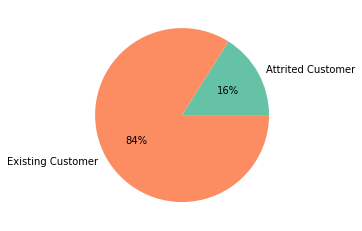

In [10]:
df_pie = data.groupby("Attrition_Flag").size().to_frame(' ')
plt.pie([1627, 8500], labels = ['Attrited Customer', 'Existing Customer'], colors = sns.color_palette('Set2'),
        autopct='%.0f%%')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


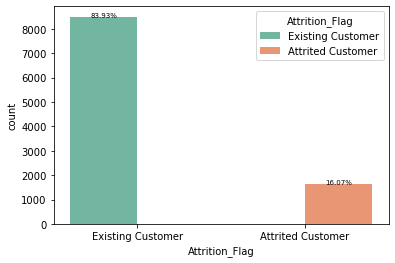

In [11]:
df_plt = data[data['Attrition_Flag'].isin(['Attrited Customer', 'Existing Customer']) ]
ax = sns.countplot(data = df_plt, x = "Attrition_Flag", hue="Attrition_Flag", palette="Set2")
n_records = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1, '{:1.2%}'.format(height/n_records), ha="center", fontsize =7)

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

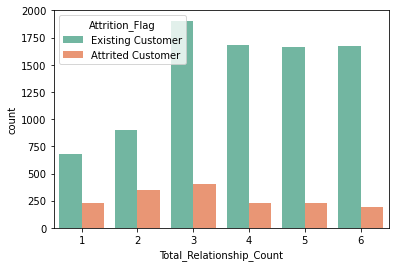

In [12]:
data["Total_Relationship_Count"].value_counts()
df_plt3 = data[data['Total_Relationship_Count'].isin([1,2,3,4,5,6])]
sns.countplot(data = df_plt3, x = "Total_Relationship_Count", hue="Attrition_Flag", palette="Set2") 

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

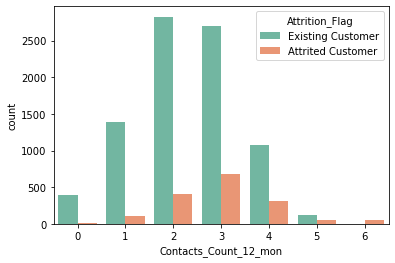

In [13]:
data["Contacts_Count_12_mon"].value_counts()
df_plt4 = data[data['Contacts_Count_12_mon'].isin([0,1,2,3,4,5,6])]
sns.countplot(data = df_plt4, x = "Contacts_Count_12_mon", hue="Attrition_Flag", palette="Set2")  

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

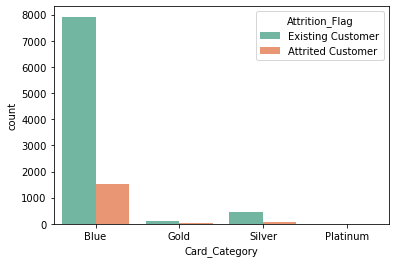

In [14]:
data["Card_Category"].value_counts()
df_plt5 = data[data['Card_Category'].isin(["Blue", "Silver", "Gold", "Platinum"])]
sns.countplot(data = df_plt4, x = "Card_Category", hue="Attrition_Flag", palette="Set2")  

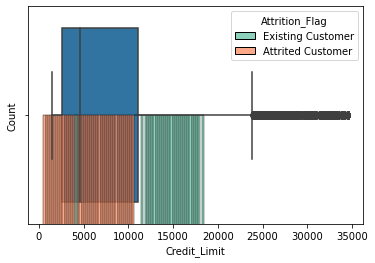

In [15]:
sns.histplot(data = data, x = "Total_Trans_Amt", hue = 'Attrition_Flag', multiple="stack", palette="Set2") # Try to unstack
ax = sns.boxplot(x = data['Credit_Limit'])

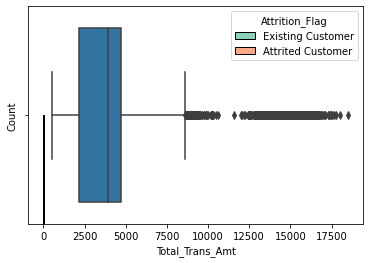

In [16]:
sns.histplot(data = data, x = "Avg_Utilization_Ratio", hue = 'Attrition_Flag', multiple="stack", palette="Set2") # Try to unstack
ax2 = sns.boxplot(x = data['Total_Trans_Amt'])

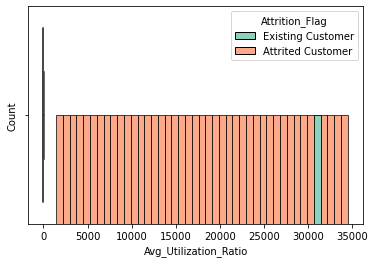

In [17]:
sns.histplot(data = data, x = "Credit_Limit", hue = 'Attrition_Flag', multiple="stack", palette="Set2") # Try to unstack
ax4 = sns.boxplot(x = data['Avg_Utilization_Ratio'])